In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

train_df = pd.read_csv("D:/prodigy task/task 2/titanic/train.csv")
test_df = pd.read_csv("D:/prodigy task/task 2/titanic/test.csv")
gender_submission_df = pd.read_csv("D:/prodigy task/task 2/titanic/gender_submission.csv")

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Fill missing Age values with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Drop rows with missing 'Embarked' values
train_df.dropna(subset=['Embarked'], inplace=True)


In [5]:
# Check for duplicate rows
train_df.duplicated().sum()

# Remove duplicates if necessary
train_df.drop_duplicates(inplace=True)


In [6]:
# Convert 'Sex' column to numeric (1 for male, 0 for female)
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})

# Convert 'Embarked' column to numeric (use pd.get_dummies or LabelEncoder)
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)


<Axes: >

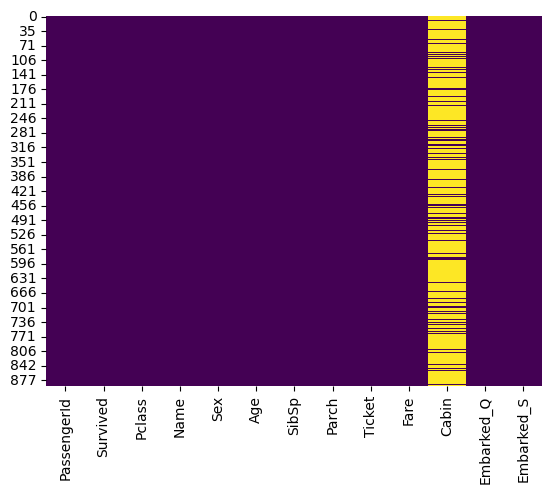

In [7]:
# Visualize missing data using heatmap
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')


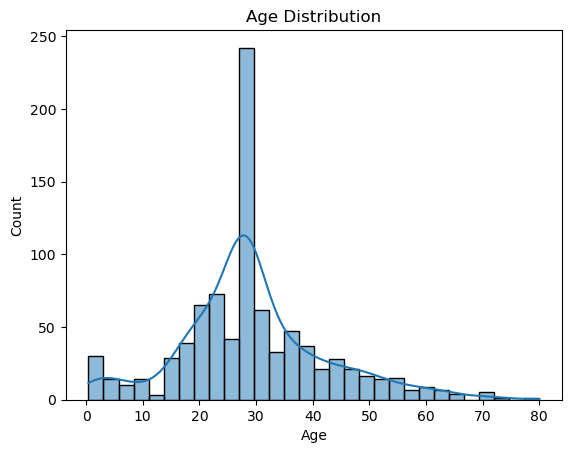

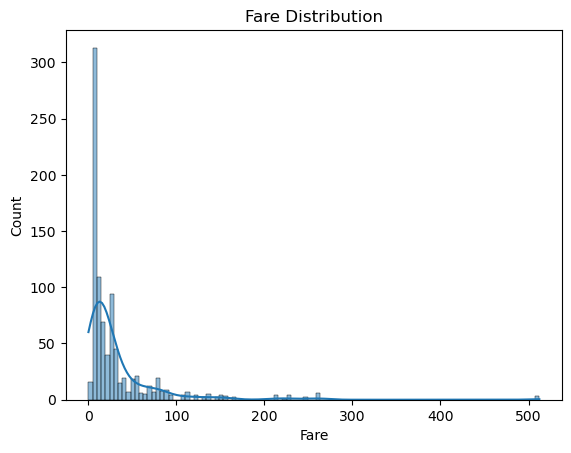

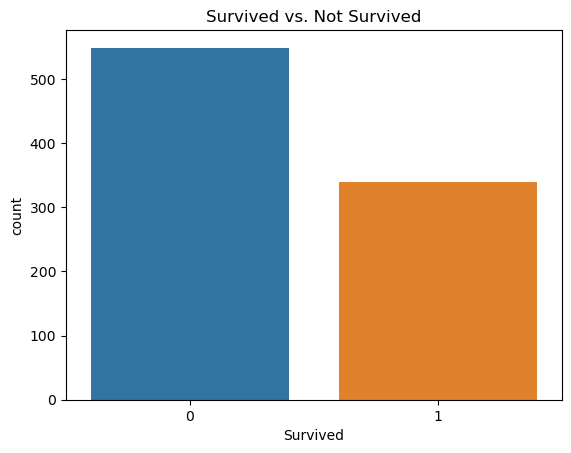

In [8]:
# Distribution of Age
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of Fare
sns.histplot(train_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Count plot of Survived (target variable)
sns.countplot(x='Survived', data=train_df)
plt.title('Survived vs. Not Survived')
plt.show()


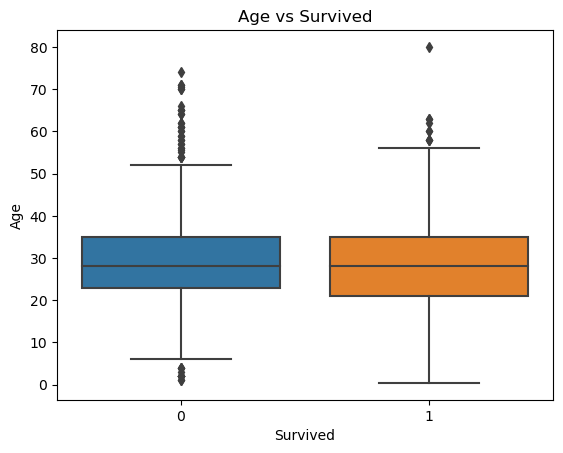

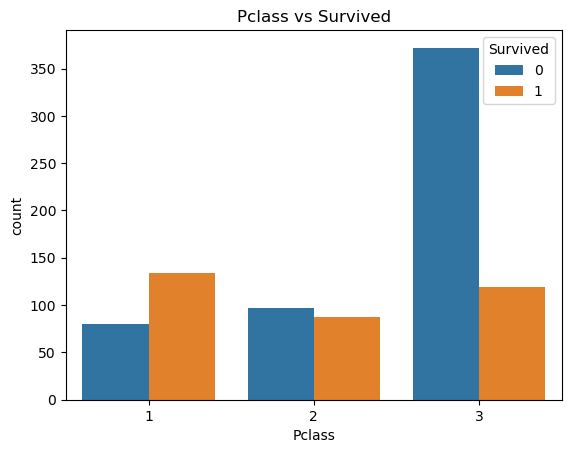

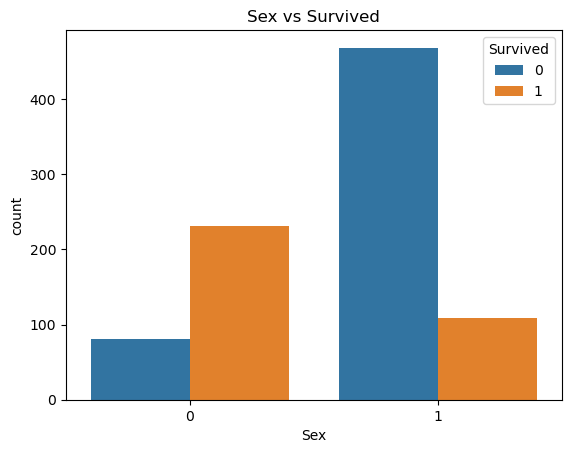

In [9]:
# Relation between Age and Survived
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age vs Survived')
plt.show()

# Relation between Pclass and Survived
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Pclass vs Survived')
plt.show()

# Relation between Sex and Survived
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Sex vs Survived')
plt.show()


C:\Users\shruti thorat\AppData\Local\Temp\ipykernel_21000\299919782.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


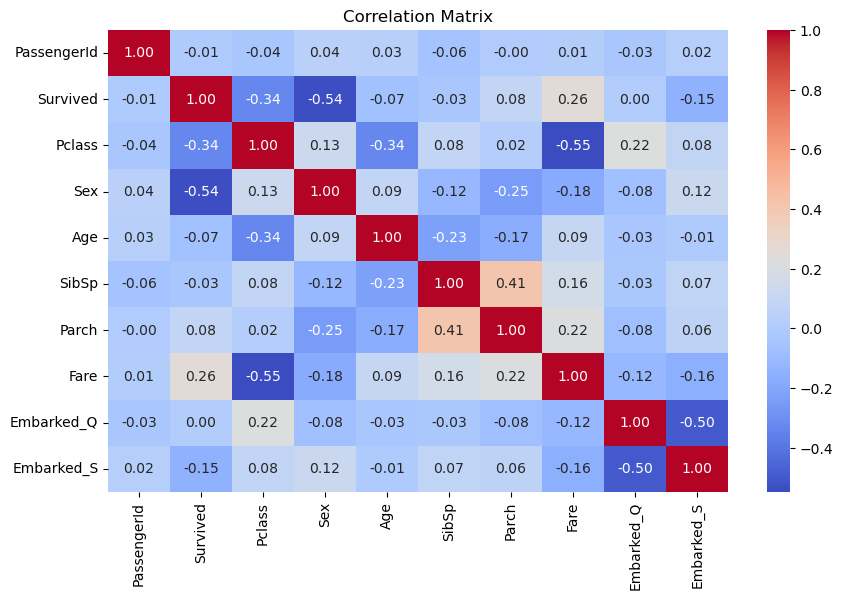

In [10]:
# Correlation matrix of numerical variables
corr_matrix = train_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [11]:
# Create family size feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1


In [12]:
train_df['Pclass'] = train_df['Pclass'].astype('category')


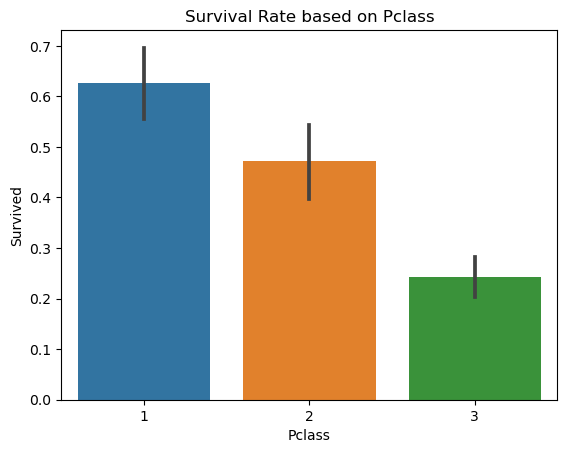

In [13]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate based on Pclass')
plt.show()


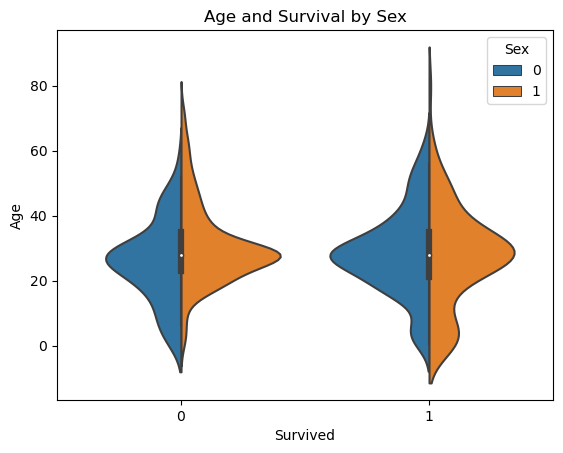

In [14]:
sns.violinplot(x='Survived', y='Age', hue='Sex', data=train_df, split=True)
plt.title('Age and Survival by Sex')
plt.show()


In [16]:
# Summary statistics of the numerical columns
train_df.describe()



,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,0.649044,29.315152,0.524184,0.382452,32.096681,0.086614,0.724409,1.906637
std,256.998173,0.486260,0.477538,12.984932,1.103705,0.806761,49.697504,0.281427,0.447063,1.614703
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,1.000000
50%,446.000000,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,668.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,2.000000
max,891.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,11.000000


In [20]:
# Check unique values in categorical columns
train_df['Sex'].value_counts()
train_df['Embarked_Q'].value_counts()


0    812
1     77
Name: Embarked_Q, dtype: int64

In [19]:
# List all column names in the DataFrame
print(train_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S',
       'FamilySize'],
      dtype='object')


In [21]:
print([col for col in train_df.columns if 'Embarked' in col])


['Embarked_Q', 'Embarked_S']


In [23]:
# Check value counts for one-hot encoded 'Embarked' columns
print(train_df[[ 'Embarked_Q', 'Embarked_S']].sum())


Embarked_Q     77
Embarked_S    644
dtype: int64


In [24]:
# Reload the original dataset to check value counts
train_df = pd.read_csv("D:/prodigy task/task 2/titanic/train.csv")
print(train_df['Embarked'].value_counts())


S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [26]:
train_df['Sex'].value_counts()
train_df['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

Columns in the dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'Embarked' column found. Checking unique values...
S    644
C    168
Q     77
Name: Embarked, dtype: int64


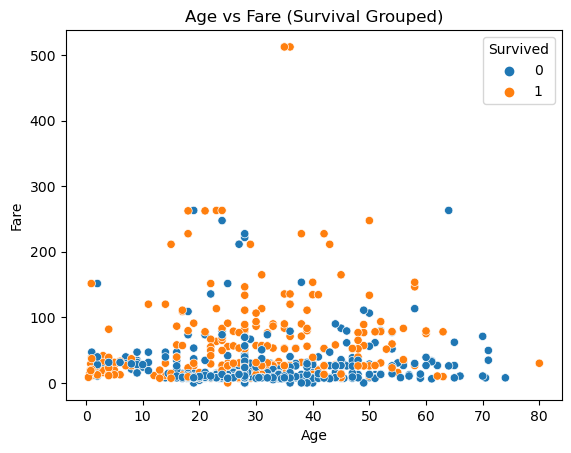

In [18]:
# Age vs Fare, grouped by survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title('Age vs Fare (Survival Grouped)')
plt.show()
